In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_df = pd.read_excel("Final_Train.xlsx")
test_df = pd.read_excel("Final_Test.xlsx")

In [5]:
train_df.head(4)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250


In [9]:
train_df.shape,test_df.shape

((5961, 7), (1987, 6))

In [11]:
train_df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [19]:
train_df.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

<AxesSubplot:>

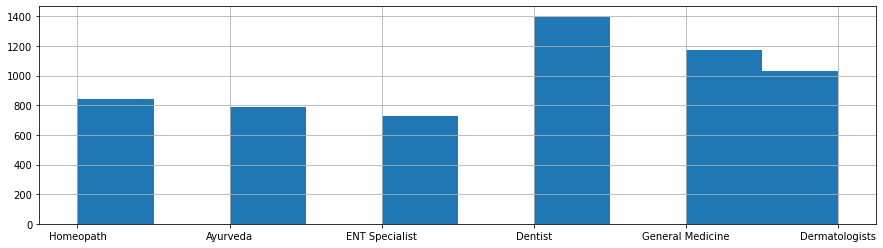

In [21]:
plt.figure(figsize=(15,4))
train_df.Profile.hist()

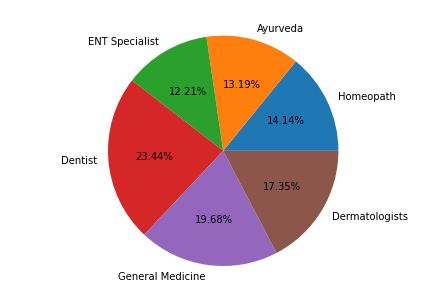

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist', 'General Medicine','Dermatologists']
students = [843,786,728,1397,1173,1034]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

In [25]:
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [27]:
#converting Experience into integer value

# Train set
train_df['years_exp'] = train_df['Experience'].str.slice(stop=2).astype(int)

# Test set
test_df['years_exp'] = test_df['Experience'].str.slice(stop=2).astype(int)

In [28]:
train_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,years_exp
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,33
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15


In [29]:
#covering all the NaN values and converting string into interger

# Train set
train_df['Rating'].fillna('0%',inplace = True)
train_df['Rating'] = train_df['Rating'].str.slice(stop=-1).astype(int)

# Test set
test_df['Rating'].fillna('0%',inplace = True)
test_df['Rating'] = test_df['Rating'].str.slice(stop=-1).astype(int)


In [30]:
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
years_exp                0
dtype: int64

# Cleaning Dataset and making it beautiful and also trying to extract as much info as we can


In [34]:
#Separate City and Locality in Place Variables

# Train Set
train_df['City'] = train_df['Place'].str.split(',').str[1]
train_df['Locality'] = train_df['Place'].str.split(',').str[0]


# Test Set
test_df['City'] = test_df['Place'].str.split(',').str[1]
test_df['Locality'] = test_df['Place'].str.split(',').str[0]


In [35]:
train_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai
...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19,Bangalore,Basavanagudi
5957,MBBS,33 years experience,0,"Nungambakkam, Chennai",General Medicine,NaN,100,33,Chennai,Nungambakkam
5958,MBBS,41 years experience,97,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41,Delhi,Greater Kailash Part 2
5959,"MBBS, MD - General Medicine",15 years experience,90,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15,Mumbai,Vileparle West


In [36]:
list(train_df.Miscellaneous_Info[0:10])

['100% 16 Feedback Kakkanad, Ernakulam',
 '98% 76 Feedback Whitefield, Bangalore',
 nan,
 'Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb',
 '100% 4 Feedback Keelkattalai, Chennai',
 nan,
 nan,
 'Dental Fillings Crowns and Bridges Fixing Impaction / Impacted Tooth Extraction',
 nan,
 nan]

In [40]:
import unicodedata
import re

from collections import Counter

import lightgbm as lgb

# import xgboost as xgb
from sklearn import metrics
from matplotlib.pylab import rcParams


In [41]:
# First of all let's convert the Indian Rupee symbol to readable INR String

# Train set
train_df.Miscellaneous_Info = train_df.Miscellaneous_Info.str.replace(unicodedata.lookup('Indian Rupee Sign'), 'INR ')

# Test set
test_df.Miscellaneous_Info = test_df.Miscellaneous_Info.str.replace(unicodedata.lookup('Indian Rupee Sign'), 'INR ')


In [42]:
# Define function to return the Feedback numbers

def find_feedback(data):
    result = re.search(r' (.*?) Feedback',data)
    if result:
        return int(result.group(1))
    else:
        return 0

In [43]:
# Fetch out the feedback numbers in different records. 

# Train set
train_df['feedack_num'] = train_df.Miscellaneous_Info.apply(lambda x: find_feedback(x) if '%' in str(x) else 0)

# Test set
test_df['feedack_num'] = test_df.Miscellaneous_Info.apply(lambda x: find_feedback(x) if '%' in str(x) else 0)



In [44]:
train_df.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality,feedack_num
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad,16
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield,76
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,Bangalore,Mathikere - BEL,0
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250,12,Bangalore,Bannerghatta Road,0
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai,4


In [45]:
# The following code is from the kaggle (https://www.kaggle.com/adepvenugopal/predicting-doctor-s-fees-using-machine-learning)
# A little help from kaggle guys
list(train_df.Miscellaneous_Info[train_df.Miscellaneous_Info.str.contains('INR', na = False)].sample(10))

['1 Feedback RT Nagar, Bangalore INR 500',
 'Janak Puri, Delhi INR 200 Visits Today',
 'Malad West, Mumbai INR 400 Visits Today',
 'Patparganj, Delhi INR 1,000 Available Tomorrow',
 'Khar West, Mumbai INR 200 Visits Today',
 'Dwarka, Delhi INR 200 Visits Today',
 'Nungambakkam, Chennai INR 500 Visits Today',
 'Patparganj, Delhi INR 600 Available on Fri, 08 Feb',
 'Khar West, Mumbai INR 600 Visits Tomorrow',
 'Kaggadasapura, Bangalore INR 400 Available Today']



    It is observed that the Fees value is not consistent as some records contains more than one fee value.
    It is also observed that the second fee value is just 120% value of the first fee value.
    So we will take only the first fee value wherever available.



In [46]:
def find_fees(data):
    result = re.search(r'INR (\d*)',data)
    if result:
        return int(result.group(1))
    else:
        return 0

In [47]:
# Fetch out the Fees value in different records. 

# Train set
train_df['fees_val'] = train_df.Miscellaneous_Info.apply(lambda x: find_fees(x) if 'INR' in str(x) else 0)

# Test set
test_df['fees_val'] = test_df.Miscellaneous_Info.apply(lambda x: find_fees(x) if 'INR' in str(x) else 0)

In [49]:
train_df.head(4)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,years_exp,City,Locality,feedack_num,fees_val
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad,16,0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield,76,0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,Bangalore,Mathikere - BEL,0,0
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250,12,Bangalore,Bannerghatta Road,0,250


In [50]:
train_df.shape

(5961, 12)

In [51]:
column_test = ['Qual_1', 'Qual_2', 'Qual_3', 'Qual_4',
           'Qual_5', 'Qual_6', 'Qual_7', 'Qual_8', 'Qual_9', 'Qual_10', 'Qual_11',
           'Qual_12', 'Qual_13', 'Qual_14', 'Qual_15', 'Qual_16', 'Qual_17']

column_train = ['Qual_1', 'Qual_2', 'Qual_3', 'Qual_4',
           'Qual_5', 'Qual_6', 'Qual_7', 'Qual_8', 'Qual_9', 'Qual_10']

In [52]:
# Encode categorical columns for Test and Train set

for i in column_train:
    train_df.replace({i: qual_dict}, inplace=True)
    
    
for i in column_test:
    test_df.replace({i: qual_dict}, inplace=True)

NameError: name 'qual_dict' is not defined